# 06 homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.
> If it's exactly in between two options, select the higher value.


### Dataset

In this homework, we continue using the fuel efficiency dataset.
Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).



### Preparing the dataset 

Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

import xgboost as xgb

In [12]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

df = pd.read_csv(data)

In [13]:
df.head(10)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


In [14]:
df.isna().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [15]:
# fill missing values with 0
df = df.fillna(0)

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values


In [19]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [20]:
# DictVectorizer
dv = DictVectorizer(sparse=True)

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)


## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?


* `'vehicle_weight'`
* `'model_year'`
* `'origin'`
* `'fuel_type'`

In [12]:
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [13]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45
* 4.5
* 45.0

In [37]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [38]:
y_val_pred = rf.predict(X_val)

rmse = root_mean_squared_error(y_val, y_val_pred)
print(f'RMSE: {rmse}')

RMSE: 0.4595777223092726


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in
your answer.

In [39]:
array_n_estimators = np.arange(10, 201, 10)
array_n_estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [40]:
for n in array_n_estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_val_pred = rf.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_val_pred)
    print(f'n {n}, RMSE: {rmse:.3f}')

n 10, RMSE: 0.460
n 20, RMSE: 0.454
n 30, RMSE: 0.452
n 40, RMSE: 0.449
n 50, RMSE: 0.447
n 60, RMSE: 0.445
n 70, RMSE: 0.445
n 80, RMSE: 0.445
n 90, RMSE: 0.445
n 100, RMSE: 0.445
n 110, RMSE: 0.444
n 120, RMSE: 0.444
n 130, RMSE: 0.444
n 140, RMSE: 0.443
n 150, RMSE: 0.443
n 160, RMSE: 0.443
n 170, RMSE: 0.443
n 180, RMSE: 0.442
n 190, RMSE: 0.442
n 200, RMSE: 0.442


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [41]:
array_max_depth = [10, 15, 20, 25]

for depth in array_max_depth:
    arr_rmse = []
    for n in array_n_estimators:
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_val_pred = rf.predict(X_val)

        rmse = root_mean_squared_error(y_val, y_val_pred)
        arr_rmse.append(rmse)

    print(f'max_depth {depth}, Avg RMSE: {np.mean(arr_rmse):.3f}')

max_depth 10, Avg RMSE: 0.442
max_depth 15, Avg RMSE: 0.445
max_depth 20, Avg RMSE: 0.446
max_depth 25, Avg RMSE: 0.446


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight`
*	`horsepower`
* `acceleration`
* `engine_displacement`	

In [50]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

feat_importances = rf.feature_importances_

#print(feat_importances)
#print(max(feat_importances))
#print(dv.get_feature_names_out())

# map max importance to feature name(s)
feature_names = dv.get_feature_names_out()
max_val = feat_importances.max()
max_idxs = np.flatnonzero(feat_importances == max_val)

print("Max importance value:", max_val)
print("Feature(s) with max importance:")
for i in max_idxs:
    print(feature_names[i], feat_importances[i])





Max importance value: 0.9591499647407432
Feature(s) with max importance:
vehicle_weight 0.9591499647407432


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [21]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)


In [22]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [23]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [24]:
evals_result = {}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, 
                  evals_result=evals_result,
                  evals=watchlist)

[0]	train-rmse:1.81393	eval-rmse:1.85444
[1]	train-rmse:1.31919	eval-rmse:1.35353
[2]	train-rmse:0.98120	eval-rmse:1.01316
[3]	train-rmse:0.75443	eval-rmse:0.78667
[4]	train-rmse:0.60680	eval-rmse:0.64318
[5]	train-rmse:0.51381	eval-rmse:0.55664
[6]	train-rmse:0.45470	eval-rmse:0.50321
[7]	train-rmse:0.41881	eval-rmse:0.47254
[8]	train-rmse:0.39534	eval-rmse:0.45509
[9]	train-rmse:0.38038	eval-rmse:0.44564
[10]	train-rmse:0.37115	eval-rmse:0.43896
[11]	train-rmse:0.36361	eval-rmse:0.43594
[12]	train-rmse:0.35850	eval-rmse:0.43558
[13]	train-rmse:0.35365	eval-rmse:0.43394
[14]	train-rmse:0.35025	eval-rmse:0.43349
[15]	train-rmse:0.34666	eval-rmse:0.43362
[16]	train-rmse:0.34459	eval-rmse:0.43378
[17]	train-rmse:0.34128	eval-rmse:0.43405
[18]	train-rmse:0.33822	eval-rmse:0.43391
[19]	train-rmse:0.33709	eval-rmse:0.43374
[20]	train-rmse:0.33553	eval-rmse:0.43376
[21]	train-rmse:0.33243	eval-rmse:0.43453
[22]	train-rmse:0.33031	eval-rmse:0.43510
[23]	train-rmse:0.32815	eval-rmse:0.43601
[2

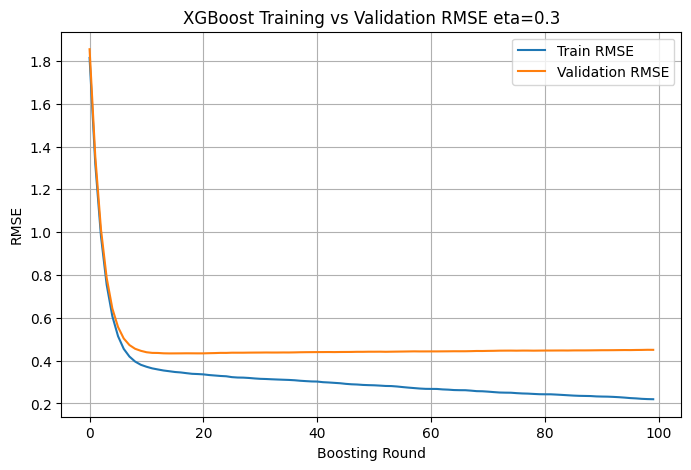

In [30]:

train_rmse = evals_result['train']['rmse']
val_rmse = evals_result['eval']['rmse']

plt.figure(figsize=(8, 5))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation RMSE eta=0.3')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
y_val_pred = model.predict(dval)

#y_val_pred

rmse = root_mean_squared_error(y_val, y_val_pred)
print(f'RMSE: {rmse}')

RMSE: 0.45017755678087246


In [27]:
xgb_params2 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [28]:
evals_result2 = {}

model2 = xgb.train(xgb_params2, dtrain, num_boost_round=100, 
                  evals_result=evals_result2,
                  evals=watchlist)

[0]	train-rmse:2.28944	eval-rmse:2.34561
[1]	train-rmse:2.07396	eval-rmse:2.12434
[2]	train-rmse:1.88066	eval-rmse:1.92597
[3]	train-rmse:1.70730	eval-rmse:1.74987
[4]	train-rmse:1.55163	eval-rmse:1.59059
[5]	train-rmse:1.41247	eval-rmse:1.44988
[6]	train-rmse:1.28796	eval-rmse:1.32329
[7]	train-rmse:1.17660	eval-rmse:1.20930
[8]	train-rmse:1.07736	eval-rmse:1.10830
[9]	train-rmse:0.98883	eval-rmse:1.02009
[10]	train-rmse:0.91008	eval-rmse:0.94062
[11]	train-rmse:0.84030	eval-rmse:0.87100
[12]	train-rmse:0.77874	eval-rmse:0.80916
[13]	train-rmse:0.72417	eval-rmse:0.75465
[14]	train-rmse:0.67626	eval-rmse:0.70780
[15]	train-rmse:0.63402	eval-rmse:0.66672
[16]	train-rmse:0.59690	eval-rmse:0.63062
[17]	train-rmse:0.56447	eval-rmse:0.60016
[18]	train-rmse:0.53619	eval-rmse:0.57383
[19]	train-rmse:0.51138	eval-rmse:0.55044
[20]	train-rmse:0.48983	eval-rmse:0.53064
[21]	train-rmse:0.47135	eval-rmse:0.51451
[22]	train-rmse:0.45501	eval-rmse:0.49998
[23]	train-rmse:0.44120	eval-rmse:0.48790
[2

In [ ]:
print(evals_result2)

{'train': OrderedDict([('rmse', [2.2894394269287983, 2.073956109588606, 1.8806603782586064, 1.7073016485571066, 1.5516331641802452, 1.4124707012359645, 1.2879601479492857, 1.1765957543169518, 1.0773581120495015, 0.9888274921549032, 0.9100759316614019, 0.8403011873257968, 0.7787400382439394, 0.7241743894289279, 0.6762635628269558, 0.6340180182024853, 0.5969044093655002, 0.5644714203880145, 0.5361913522618315, 0.5113825983131332, 0.48983303045784427, 0.47135297524695213, 0.4550146743964494, 0.44119613460271534, 0.42929010518340577, 0.41880747179364947, 0.40952668957109084, 0.401734862974729, 0.3946999290766612, 0.3887252895396322, 0.3834240069621995, 0.37875977499286395, 0.37450187826391784, 0.37073122647075285, 0.36743491457464267, 0.3643540644296117, 0.36178253737569316, 0.3592695962487393, 0.3571347542299502, 0.35506334707596343, 0.3534343634958179, 0.3519494399491884, 0.35024134186772066, 0.3486203899062777, 0.3471373848486414, 0.346214938632917, 0.3447656785274829, 0.343420632386183

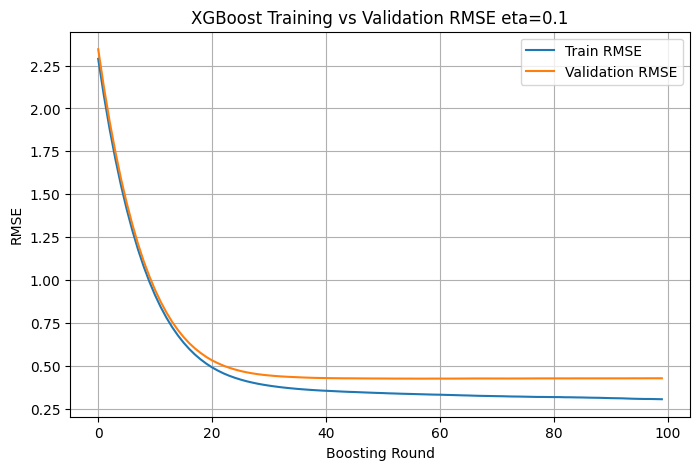

In [29]:

train_rmse = evals_result2['train']['rmse']
val_rmse = evals_result2['eval']['rmse']

plt.figure(figsize=(8, 5))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation RMSE eta=0.1')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
y_val_pred = model.predict(dval)

#y_val_pred

rmse = root_mean_squared_error(y_val, y_val_pred)
print(f'RMSE: {rmse}')

RMSE: 0.42622800553359225
